In [2]:
import yt
from yt.units import *
from header import *

In [4]:
ds = yt.load('/Users/acharyya/models/simulation_output/foggie/halo_008508/nref11c_nref9f/RD0030/RD0030')

yt : [INFO     ] 2023-01-16 21:00:37,705 Parameters: current_time              = 342.59335094489
yt : [INFO     ] 2023-01-16 21:00:37,706 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-01-16 21:00:37,707 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-16 21:00:37,707 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-16 21:00:37,708 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-16 21:00:37,708 Parameters: current_redshift          = 0.69999998985822
yt : [INFO     ] 2023-01-16 21:00:37,709 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-01-16 21:00:37,710 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-01-16 21:00:37,711 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-01-16 21:00:37,711 Parameters: hubble_constant           = 0.695


In [142]:
galrad = 10 # kpc
res = 1 # kpc
npix = int(2*galrad/res)
field1, field2 = 'deposit', 'stars_density' #'gas', 'density' # 
units = 'Msun/pc**2'

In [143]:
center = ds.arr([41634.02479345, 40640.37265041, 42800.25416985], 'kpc')
ds.halo_center_kpc = center
x_width = 2 * galrad * kpc
box = ds.r[center[0] - x_width / 2.: center[0] + x_width / 2., center[1] - x_width / 2.: center[1] + x_width / 2., center[2] - x_width / 2.: center[2] + x_width / 2.]

In [144]:
filter_particles(box, filter_particle_types = ['young_stars', 'stars'])
ds.add_field(('stars', 'radius_corrected'), function=radius_corrected_stars, units='kpc', take_log=False, force_override=True, sampling_type='particle')
ds.add_field(('young_stars', 'radius_corrected'), function=radius_corrected_young_stars, units='kpc', take_log=False, force_override=True, sampling_type='particle')

yt : [INFO     ] 2023-01-17 02:23:51,077 Projection completed
yt : [INFO     ] 2023-01-17 02:23:51,135 xlim = 40630.372650 40650.372650
yt : [INFO     ] 2023-01-17 02:23:51,138 ylim = 42790.254170 42810.254170
yt : [INFO     ] 2023-01-17 02:23:51,143 xlim = 0.480048 0.480284
yt : [INFO     ] 2023-01-17 02:23:51,144 ylim = 0.505567 0.505803
yt : [INFO     ] 2023-01-17 02:23:51,161 Making a fixed resolution buffer of (('deposit', 'stars_density')) 800 by 800



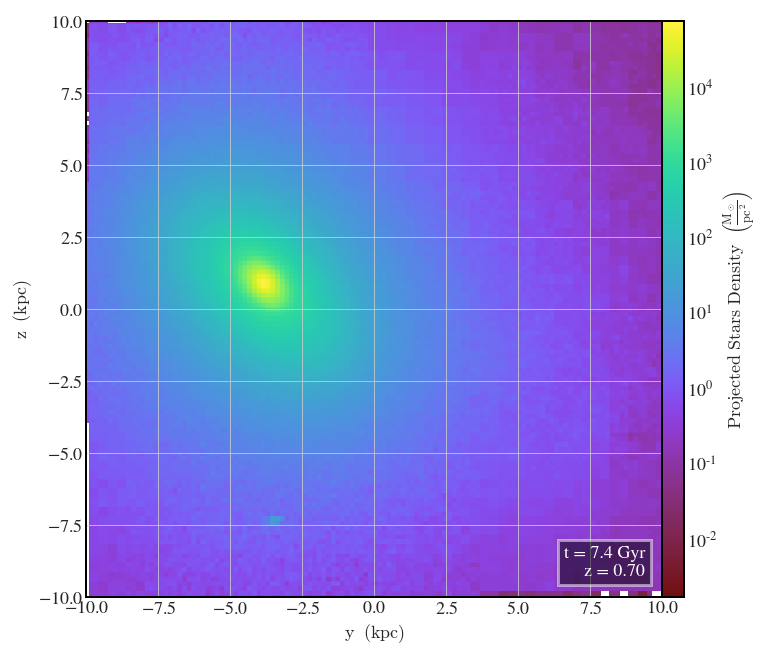

In [145]:
proj = yt.ProjectionPlot(ds, 'x', (field1, field2), center=center, data_source=box, width=x_width)
proj.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
proj.set_unit((field1, field2), units)
#proj.set_zlim((field1, field2), zmin=10**-2.5, zmax=10**2.5)

yt : [INFO     ] 2023-01-17 02:23:52,466 Making a fixed resolution buffer of (('deposit', 'stars_density')) 20 by 20



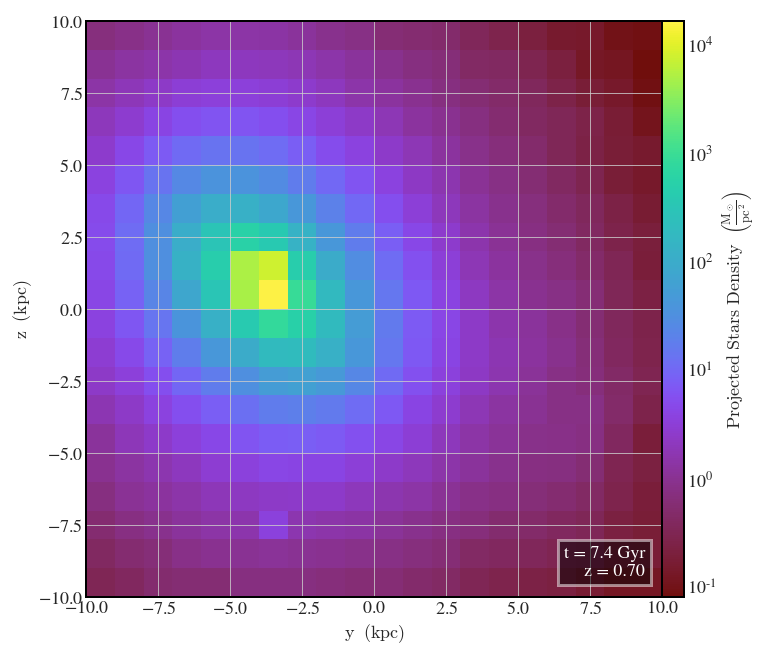

In [146]:
proj.set_buff_size((npix, npix))

In [138]:
proj2 = ds.proj((field1, field2), 'x', center=center, data_source=box)

yt : [INFO     ] 2023-01-16 22:36:29,301 Projection completed


In [139]:
frb = proj2.to_frb((2*galrad, "kpc"), npix, center=center)

yt : [INFO     ] 2023-01-16 22:36:33,277 Making a fixed resolution buffer of (('deposit', 'young_stars_density')) 20 by 20


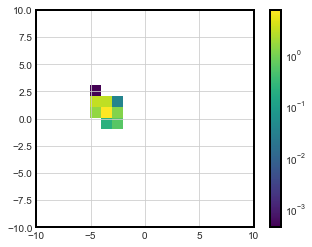

In [140]:
plt.imshow(np.array(frb[field1, field2].in_units(units)), cmap='viridis', norm=LogNorm(), extent=(-10, 10, -10, 10))#, vmin=10**-2.5, vmax=10**2.5)
plt.colorbar()

In [128]:
ad = ds.all_data()
box_smass = box[field1, field2]
full_smass = ad[field1, field2]

In [129]:
box_smass.shape, full_smass.shape

((996969,), (58055488,))

In [130]:
box2 = ds.arbitrary_grid(left_edge=[center[0] - x_width / 2., center[1] - x_width / 2., center[2] - x_width / 2.], \
                         right_edge = [center[0] + x_width / 2., center[1] + x_width / 2., center[2] + x_width / 2.], \
                         dims=[npix, npix, npix])

In [131]:
box2_smass = box2[field1, field2]

In [134]:
box2_smass.shape

(20, 20, 20)

In [137]:
box_smass

unyt_array([0., 0., 0., ..., 0., 0., 0.], 'g/cm**3')

In [147]:
box, center, x_width

(YTRegion (RD0030): , center=[1.28469177e+26 1.25403087e+26 1.32067785e+26] cm cm, left_edge=[1.28438320e+26 1.25372230e+26 1.32036928e+26] cm cm, right_edge=[1.28500034e+26 1.25433944e+26 1.32098642e+26] cm cm,
 unyt_array([41634.02479345, 40640.37265041, 42800.25416985], 'kpc'),
 unyt_quantity(20, 'kpc'))